In [1]:
# This dataset has data of the world climatic conditons on daily basis for 2020. We intend to predict the percipitation intensity
# based on other climatic conditions.

In [12]:
df = read.csv("C:\\Users\\hp\\Downloads\\all_countries_weather\\daily_weather_2020.csv")

In [48]:
library(ggplot2)
library(MASS)
library(pastecs)
library(heatmaply)
library(naniar)
library(Hmisc)
library(ggplot2)
library(tidyr)
library(GGally)
library(corrplot)
# For Linear regression 
library(caret)
library(caTools)
library(dplyr)
library(readxl)

In [4]:
df

X,Country.Region,Province.State,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,⋯,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long,precipAccumulation
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0,Afghanistan,,2019-12-31,"Rain (with a chance of 1â€“3 in. of snow) until night, starting again in the afternoon.",rain,1577846640,1577882700,0.20,0.0156,⋯,1577827140,48.36,1577864700,30.51,1577835720,47.86,1577864700,33,65,NA
1,Afghanistan,,2020-01-01,Light rain throughout the day.,rain,1577933040,1577969160,0.23,0.0235,⋯,1577918820,40.42,1577951460,29.84,1577919420,40.08,1577951220,33,65,NA
2,Afghanistan,,2020-01-02,Clear throughout the day.,rain,1578019440,1578055560,0.26,0.0016,⋯,1578020400,46.53,1578038340,26.27,1578020400,46.03,1578038340,33,65,NA
3,Afghanistan,,2020-01-03,Partly cloudy throughout the day.,partly-cloudy-day,1578105900,1578142020,0.30,0.0003,⋯,1578106320,45.77,1578124500,26.96,1578093240,45.35,1578124260,33,65,NA
4,Afghanistan,,2020-01-04,Light rain throughout the day.,rain,1578192300,1578228480,0.33,0.0145,⋯,1578193080,40.84,1578222000,33.33,1578193080,40.34,1578222000,33,65,NA
5,Afghanistan,,2020-01-05,Light rain until afternoon.,rain,1578278700,1578314940,0.36,0.0196,⋯,1578335400,44.54,1578297660,32.83,1578335400,44.07,1578297360,33,65,NA
6,Afghanistan,,2020-01-06,Clear throughout the day.,clear-day,1578365100,1578401340,0.39,0.0004,⋯,1578366180,44.15,1578390600,22.28,1578421800,42.75,1578389160,33,65,NA
7,Afghanistan,,2020-01-07,Clear throughout the day.,clear-day,1578451500,1578487800,0.43,0.0000,⋯,1578451860,44.69,1578476880,15.87,1578451740,44.22,1578476760,33,65,NA
8,Afghanistan,,2020-01-08,Clear throughout the day.,clear-day,1578537900,1578574260,0.46,0.0000,⋯,1578537660,48.08,1578563280,21.20,1578537360,47.58,1578563280,33,65,NA


In [5]:
str(df)

'data.frame':	30688 obs. of  45 variables:
 $ X                          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Country.Region             : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Province.State             : chr  "" "" "" "" ...
 $ time                       : chr  "2019-12-31" "2020-01-01" "2020-01-02" "2020-01-03" ...
 $ summary                    : chr  "Rain (with a chance of 1â\200“3 in. of snow) until night, starting again in the afternoon." "Light rain throughout the day." "Clear throughout the day." "Partly cloudy throughout the day." ...
 $ icon                       : chr  "rain" "rain" "rain" "partly-cloudy-day" ...
 $ sunriseTime                : num  1.58e+09 1.58e+09 1.58e+09 1.58e+09 1.58e+09 ...
 $ sunsetTime                 : num  1.58e+09 1.58e+09 1.58e+09 1.58e+09 1.58e+09 ...
 $ moonPhase                  : num  0.2 0.23 0.26 0.3 0.33 0.36 0.39 0.43 0.46 0.5 ...
 $ precipIntensity            : num  0.0156 0.0235 0.0016 0.0003 0.0145 0.0196 0

In [6]:
# Data Extraction

In [7]:
# Here we drop off the columns which doesnt fit our motive and have least effect on calculating precipitation
# Thus we remove X, Country.Region, Province.State, time, summary, icon, precipType as they are characters with numerous values
# as well they have least affect on percipitation

In [13]:
new_df = subset(df, select = -c(X, Country.Region, Province.State, time, summary, icon, precipType))

In [9]:
str(new_df)

'data.frame':	30688 obs. of  38 variables:
 $ sunriseTime                : num  1.58e+09 1.58e+09 1.58e+09 1.58e+09 1.58e+09 ...
 $ sunsetTime                 : num  1.58e+09 1.58e+09 1.58e+09 1.58e+09 1.58e+09 ...
 $ moonPhase                  : num  0.2 0.23 0.26 0.3 0.33 0.36 0.39 0.43 0.46 0.5 ...
 $ precipIntensity            : num  0.0156 0.0235 0.0016 0.0003 0.0145 0.0196 0.0004 0 0 0.0001 ...
 $ precipIntensityMax         : num  0.1515 0.0985 0.0062 0.0012 0.031 ...
 $ precipIntensityMaxTime     : num  1.58e+09 1.58e+09 1.58e+09 1.58e+09 1.58e+09 ...
 $ precipProbability          : num  0.71 0.95 0.25 0.14 0.83 0.91 0.12 0.03 0.01 0.02 ...
 $ temperatureHigh            : num  48.4 40.4 46.5 45.8 40.8 ...
 $ temperatureHighTime        : int  1577864700 1577951460 1578038340 1578124500 1578222000 1578297660 1578390600 1578476880 1578563280 1578643260 ...
 $ temperatureLow             : num  32.1 28.9 28.8 32.8 37.2 ...
 $ temperatureLowTime         : int  1577922180 1578020400 15

In [ ]:
# Data Preprocessing

In [10]:
# Now that we have all numeric values, we further untend to perform Data Cleansing where we deal with missing values and outlier

In [14]:
(new_df) # as we can see few columns have very low missing values, we replace them with mean of column
# the column precipAccumulation has extremely high missing values thus we drop the column.

,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,temperatureHigh,temperatureHighTime,temperatureLow,⋯,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long,precipAccumulation
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1577846640,1577882700,0.20,0.0156,0.1515,1577902320,0.71,48.36,1577864700,32.13,⋯,1577827140,48.36,1577864700,30.51,1577835720,47.86,1577864700,33,65,NA
2,1577933040,1577969160,0.23,0.0235,0.0985,1577907000,0.95,40.42,1577951460,28.90,⋯,1577918820,40.42,1577951460,29.84,1577919420,40.08,1577951220,33,65,NA
3,1578019440,1578055560,0.26,0.0016,0.0062,1578009780,0.25,46.53,1578038340,28.80,⋯,1578020400,46.53,1578038340,26.27,1578020400,46.03,1578038340,33,65,NA
4,1578105900,1578142020,0.30,0.0003,0.0012,1578157740,0.14,45.77,1578124500,32.84,⋯,1578106320,45.77,1578124500,26.96,1578093240,45.35,1578124260,33,65,NA
5,1578192300,1578228480,0.33,0.0145,0.0310,1578200340,0.83,40.84,1578222000,37.25,⋯,1578193080,40.84,1578222000,33.33,1578193080,40.34,1578222000,33,65,NA
6,1578278700,1578314940,0.36,0.0196,0.0442,1578260520,0.91,44.54,1578297660,28.10,⋯,1578335400,44.54,1578297660,32.83,1578335400,44.07,1578297360,33,65,NA
7,1578365100,1578401340,0.39,0.0004,0.0051,1578340740,0.12,44.15,1578390600,23.66,⋯,1578366180,44.15,1578390600,22.28,1578421800,42.75,1578389160,33,65,NA
8,1578451500,1578487800,0.43,0.0000,0.0002,1578463200,0.03,44.69,1578476880,26.65,⋯,1578451860,44.69,1578476880,15.87,1578451740,44.22,1578476760,33,65,NA
9,1578537900,1578574260,0.46,0.0000,0.0001,1578518400,0.01,48.08,1578563280,24.53,⋯,1578537660,48.08,1578563280,21.20,1578537360,47.58,1578563280,33,65,NA


In [12]:
new_df$sunriseTime[is.na(new_df$sunriseTime)]<-mean(new_df$sunriseTime,na.rm=TRUE)

In [13]:
new_df$sunsetTime[is.na(new_df$sunsetTime)]<-mean(new_df$sunsetTime,na.rm=TRUE)

In [14]:
new_df$precipIntensityMaxTime[is.na(new_df$precipIntensityMaxTime)]<-mean(new_df$precipIntensityMaxTime,na.rm=TRUE)

In [15]:
new_df = subset(new_df, select = -c(precipAccumulation))

In [16]:
summary(new_df)

  sunriseTime          sunsetTime          moonPhase    precipIntensity   
 Min.   :1.578e+09   Min.   :1.578e+09   Min.   :0.00   Min.   :0.000000  
 1st Qu.:1.580e+09   1st Qu.:1.580e+09   1st Qu.:0.26   1st Qu.:0.000100  
 Median :1.583e+09   Median :1.583e+09   Median :0.51   Median :0.000800  
 Mean   :1.583e+09   Mean   :1.583e+09   Mean   :0.51   Mean   :0.004782  
 3rd Qu.:1.585e+09   3rd Qu.:1.585e+09   3rd Qu.:0.77   3rd Qu.:0.004400  
 Max.   :1.587e+09   Max.   :1.588e+09   Max.   :1.00   Max.   :0.280700  
 precipIntensityMax precipIntensityMaxTime precipProbability temperatureHigh 
 Min.   :0.00000    Min.   :1.578e+09      Min.   :0.0000    Min.   :-64.30  
 1st Qu.:0.00040    1st Qu.:1.580e+09      1st Qu.:0.0600    1st Qu.: 47.40  
 Median :0.00300    Median :1.583e+09      Median :0.1600    Median : 65.52  
 Mean   :0.02002    Mean   :1.583e+09      Mean   :0.3005    Mean   : 63.82  
 3rd Qu.:0.01930    3rd Qu.:1.585e+09      3rd Qu.:0.5000    3rd Qu.: 82.75  
 Max.  

In [17]:
# Data Redundancy check and Transformation
# Here we remove the redundant and covariant variables and further transform the data and bring all the variables to same scale

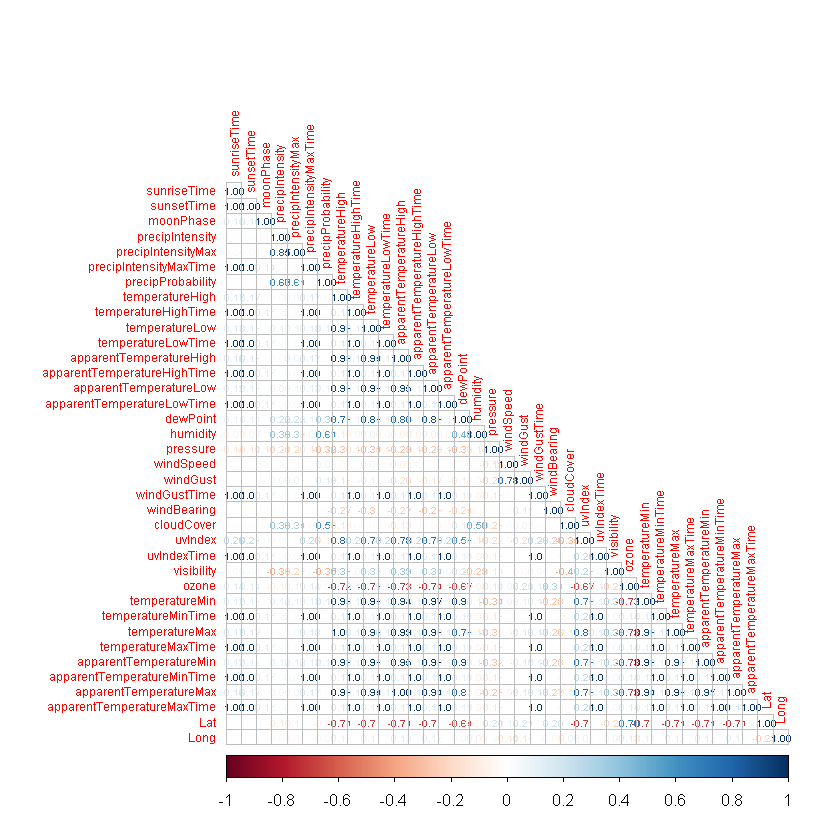

In [18]:
dwd.data.cor <- cor(new_df)
corrplot(dwd.data.cor, method="number", 
         type = "lower", tl.cex = 0.6, 
         number.cex = 0.5)

In [19]:
corMatrix = round(cor(new_df), 3)
corMatrix

,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,temperatureHigh,temperatureHighTime,temperatureLow,⋯,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long
sunriseTime,1.000,1.000,0.145,0.019,0.040,0.996,-0.004,0.169,0.999,0.126,⋯,0.125,0.999,0.170,0.999,0.124,0.999,0.165,0.999,0.003,0.005
sunsetTime,1.000,1.000,0.145,0.019,0.040,0.996,-0.004,0.170,0.999,0.126,⋯,0.126,0.999,0.170,0.999,0.124,0.999,0.165,0.999,0.002,0.005
moonPhase,0.145,0.145,1.000,-0.010,-0.005,0.144,-0.012,0.015,0.145,0.010,⋯,0.008,0.145,0.017,0.145,0.007,0.145,0.015,0.145,0.002,0.007
precipIntensity,0.019,0.019,-0.010,1.000,0.849,0.018,0.674,0.024,0.019,0.097,⋯,0.122,0.020,0.030,0.019,0.116,0.021,0.051,0.019,-0.103,-0.045
precipIntensityMax,0.040,0.040,-0.005,0.849,1.000,0.039,0.613,0.054,0.040,0.102,⋯,0.129,0.041,0.059,0.040,0.123,0.042,0.078,0.040,-0.096,-0.050
precipIntensityMaxTime,0.996,0.996,0.144,0.018,0.039,1.000,-0.007,0.175,0.997,0.130,⋯,0.129,0.996,0.175,0.997,0.129,0.996,0.171,0.997,0.001,0.009
precipProbability,-0.004,-0.004,-0.012,0.674,0.613,-0.007,1.000,-0.024,-0.004,0.122,⋯,0.162,-0.001,-0.018,-0.004,0.147,-0.001,0.015,-0.004,-0.074,-0.051
temperatureHigh,0.169,0.170,0.015,0.024,0.054,0.175,-0.024,1.000,0.174,0.931,⋯,0.929,0.172,0.999,0.175,0.934,0.172,0.991,0.175,-0.706,0.119
temperatureHighTime,0.999,0.999,0.145,0.019,0.040,0.997,-0.004,0.174,1.000,0.130,⋯,0.129,1.000,0.174,1.000,0.129,1.000,0.170,1.000,0.001,0.006
temperatureLow,0.126,0.126,0.010,0.097,0.102,0.130,0.122,0.931,0.130,1.000,⋯,0.978,0.128,0.931,0.131,0.976,0.128,0.939,0.131,-0.695,0.101


In [ ]:
# columns with correlation less than 0.02 positive and negative are dropped, we drop 19 columns.

In [20]:
x = which(corMatrix[,7]<0.02 & corMatrix[,7]>-0.02)
x

sunriseTime                  sunsetTime 
                          1                           2 
                  moonPhase      precipIntensityMaxTime 
                          3                           6 
        temperatureHighTime          temperatureLowTime 
                          9                          11 
    apparentTemperatureHigh apparentTemperatureHighTime 
                         12                          13 
 apparentTemperatureLowTime                windGustTime 
                         15                          21 
                windBearing                 uvIndexTime 
                         22                          25 
         temperatureMinTime              temperatureMax 
                         29                          30 
         temperatureMaxTime  apparentTemperatureMinTime 
                         31                          33 
     apparentTemperatureMax  apparentTemperatureMaxTime 
                         34                          35

In [21]:
new_df_1 = new_df[,-c(x)]

In [22]:
new_df_1

,precipIntensity,precipIntensityMax,precipProbability,temperatureHigh,temperatureLow,apparentTemperatureLow,dewPoint,humidity,pressure,windSpeed,windGust,cloudCover,uvIndex,visibility,ozone,temperatureMin,apparentTemperatureMin,Lat,Long
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0156,0.1515,0.71,48.36,32.13,29.04,23.88,0.60,1019.1,2.56,6.60,0.99,2,5.534,372.6,32.96,30.51,33,65
2,0.0235,0.0985,0.95,40.42,28.90,26.27,33.61,0.90,1021.2,2.06,7.08,0.99,2,1.192,330.2,32.33,29.84,33,65
3,0.0016,0.0062,0.25,46.53,28.80,26.96,29.86,0.76,1022.7,2.45,4.78,0.22,3,9.957,320.3,28.90,26.27,33,65
4,0.0003,0.0012,0.14,45.77,32.84,33.33,26.61,0.69,1021.9,2.95,5.83,0.32,3,10.000,309.6,28.80,26.96,33,65
5,0.0145,0.0310,0.83,40.84,37.25,37.74,33.14,0.88,1016.1,1.98,6.14,1.00,2,4.142,308.2,32.84,33.33,33,65
6,0.0196,0.0442,0.91,44.54,28.10,22.90,34.56,0.85,1016.7,2.60,7.68,0.74,3,5.383,323.1,34.89,32.83,33,65
7,0.0004,0.0051,0.12,44.15,23.66,15.87,20.55,0.58,1022.7,4.28,12.01,0.15,3,10.000,331.1,28.10,22.28,33,65
8,0.0000,0.0002,0.03,44.69,26.65,21.20,10.64,0.41,1025.3,5.06,13.91,0.00,3,10.000,319.7,23.66,15.87,33,65
9,0.0000,0.0001,0.01,48.08,24.53,18.64,6.56,0.31,1023.1,3.56,7.66,0.01,3,10.000,322.0,26.65,21.20,33,65


In [23]:
# As we have removed the columns with least correlation, we further cube root transform the data to scale it.

In [24]:
#cube_df = (new_df_1)^(1/3)

In [25]:
cube_df = sign(new_df_1)*((abs(new_df_1))^(1/3))

In [26]:
summary(new_df_1)

 precipIntensity    precipIntensityMax precipProbability temperatureHigh 
 Min.   :0.000000   Min.   :0.00000    Min.   :0.0000    Min.   :-64.30  
 1st Qu.:0.000100   1st Qu.:0.00040    1st Qu.:0.0600    1st Qu.: 47.40  
 Median :0.000800   Median :0.00300    Median :0.1600    Median : 65.52  
 Mean   :0.004782   Mean   :0.02002    Mean   :0.3005    Mean   : 63.82  
 3rd Qu.:0.004400   3rd Qu.:0.01930    3rd Qu.:0.5000    3rd Qu.: 82.75  
 Max.   :0.280700   Max.   :1.28130    Max.   :1.0000    Max.   :111.61  
 temperatureLow   apparentTemperatureLow    dewPoint         humidity     
 Min.   :-66.63   Min.   :-101.87        Min.   :-89.53   Min.   :0.0200  
 1st Qu.: 31.96   1st Qu.:  27.52        1st Qu.: 26.14   1st Qu.:0.5900  
 Median : 47.36   Median :  45.65        Median : 40.89   Median :0.7300  
 Mean   : 47.06   Mean   :  45.10        Mean   : 42.10   Mean   :0.6857  
 3rd Qu.: 66.64   3rd Qu.:  67.72        3rd Qu.: 64.02   3rd Qu.:0.8200  
 Max.   : 86.93   Max.   :  99.7

In [27]:
summary(cube_df)

 precipIntensity   precipIntensityMax precipProbability temperatureHigh 
 Min.   :0.00000   Min.   :0.00000    Min.   :0.0000    Min.   :-4.006  
 1st Qu.:0.04642   1st Qu.:0.07368    1st Qu.:0.3915    1st Qu.: 3.619  
 Median :0.09283   Median :0.14422    Median :0.5429    Median : 4.031  
 Mean   :0.11592   Mean   :0.18955    Mean   :0.5782    Mean   : 3.901  
 3rd Qu.:0.16386   3rd Qu.:0.26824    3rd Qu.:0.7937    3rd Qu.: 4.358  
 Max.   :0.65476   Max.   :1.08613    Max.   :1.0000    Max.   : 4.815  
 temperatureLow   apparentTemperatureLow    dewPoint         humidity     
 Min.   :-4.054   Min.   :-4.670         Min.   :-4.474   Min.   :0.2714  
 1st Qu.: 3.173   1st Qu.: 3.019         1st Qu.: 2.968   1st Qu.:0.8387  
 Median : 3.618   Median : 3.574         Median : 3.445   Median :0.9004  
 Mean   : 3.413   Mean   : 3.247         Mean   : 3.217   Mean   :0.8698  
 3rd Qu.: 4.054   3rd Qu.: 4.076         3rd Qu.: 4.000   3rd Qu.:0.9360  
 Max.   : 4.430   Max.   : 4.638       

In [28]:
# Now our data is ready to be fed into to the model
# We create train and test data with 80 20 ratio

In [77]:
split <- sample.split(cube_df, SplitRatio = 0.8)

In [78]:
train <- subset(cube_df, split == "TRUE") 
test <- subset(cube_df, split == "FALSE") 

In [79]:
dim(train)

[1] 24228    19

In [80]:
dim(test)

[1] 6460   19

In [33]:
# Now I will create a linear regression model on train set

In [34]:
linear_model = lm(
    as.formula(paste(colnames(train)[1], "~",
        paste(colnames(train)[c(2:19)], collapse = "+"),
        sep = ""
    )),
    data=cube_df
)
summary(linear_model)


Call:
lm(formula = as.formula(paste(colnames(train)[1], "~", paste(colnames(train)[c(2:19)], 
    collapse = "+"), sep = "")), data = cube_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21020 -0.01139  0.00226  0.01216  0.17984 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -3.418e-02  5.445e-02  -0.628 0.530261    
precipIntensityMax      4.958e-01  1.858e-03 266.851  < 2e-16 ***
precipProbability       5.974e-02  1.184e-03  50.450  < 2e-16 ***
temperatureHigh         1.815e-03  4.310e-04   4.212 2.54e-05 ***
temperatureLow          1.592e-03  4.453e-04   3.574 0.000351 ***
apparentTemperatureLow  4.579e-04  3.532e-04   1.296 0.194848    
dewPoint               -4.383e-03  3.314e-04 -13.229  < 2e-16 ***
humidity                1.870e-02  2.193e-03   8.529  < 2e-16 ***
pressure                1.139e-02  5.406e-03   2.107 0.035168 *  
windSpeed               4.541e-03  5.824e-04   7.797 6.51e-15 ***
windGust   

In [53]:
pred = predict(linear_model, newdata = test[,2:19])

In [1]:
# We calculate the root mean square error of our model on training data set 

In [2]:
# rmse = function(linear_model){
#   sqrt(sum((linear_model$residual)^2)/nrow(linear_model$model))
# }

In [3]:
# rmse(linear_model)

In [4]:
# Further we calculate the rmse on testing set and this gives us the picture of how our model is perfromimg in general 
# and not just on the training set

In [5]:
# rmse2 = function(obs, preds){
#   sqrt(sum((obs-preds)^2)/length(obs))
# }

In [6]:
# rmse2(test$precipIntensity,pred)

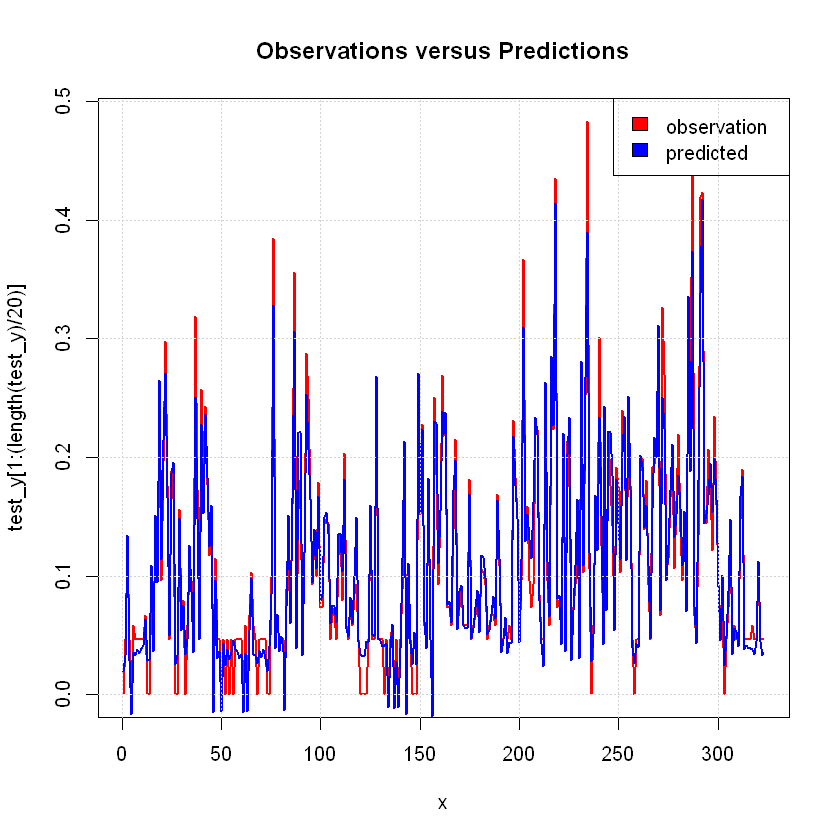

In [63]:
x = 1:length(test$precipIntensity[1:(length(test$precipIntensity)/20)])

test_y = test$precipIntensity

plot(x, test_y[1:(length(test_y)/20)], col = "red", type = "l", lwd=2,
     main = "Observations versus Predictions")
lines(x, pred[1:(length(pred)/20)], col = "blue", lwd=2)
legend("topright",  legend = c("observation", "predicted"), 
       fill = c("red", "blue"), col = 2:3,  adj = c(0, 0.6))
grid()


In [54]:
test_y = (test$precipIntensity)

In [ ]:
# Final Evaluation

In [55]:
mse = mean((test_y - pred)^2)
mae = caret::MAE(pred, test_y)
rmse = caret::RMSE(pred, test_y)
R2 = caret::R2(test_y,pred)
cat("R-sqaured: ",R2, "MSE: ", mse, "MAE: ", mae, " RMSE: ", rmse)

R-sqaured:  0.9361423 MSE:  0.0004723808 MAE:  0.01584654  RMSE:  0.02173432

In [ ]:
# Evaluation